## Introduction 
---
In this Project, We are going to make an explanatory graph for the audience using information design principles(familiarity and maximizing the data-ink ratio).
We will use the following while we make our graph:
* creating storytelling data visualizations using Matplotlib
* creating Visual patterns using Gestalt Principles
* Using pre-attentive attributes to guide audience's attention
* Using Matplotlib's built-in-stlyles

The [Dataset](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) we are using in this project was uploaded to Kaggle by Daria Chemkaeva. The Dataset describes Euro daily exchange rates between 1999 and 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.style as style
%matplotlib inline

exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Dataset cleaning
---

Before we dive into our graph making process, We'll clean some areas of our Dataset that we need in this project.
Looking at the first few rows of our Dataset, These are a few things that need changing:
* We rename the `[US dollar ]` and `Period\Unit:` columns to something easier to type — `US_dollar` and `Time`.
* We change the `Time` column to a `datetime` data type.
* We sort the values by `Time` in ascending order.
* We reset the index (and drop the initial index).

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


Now, We have decided that we'll make a graph that shows trends in the euro-Dollar rate from 1999-2021, So, We will isolate the `US_dollar` column and make it into a seperate variable `euro_to_dollar`.

In [5]:
euro_to_dollar=exchange_rates[['Time','US_dollar']].copy()
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276


In [6]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.2365     1
1.1309     1
1.1963     1
1.0715     1
1.2682     1
Name: US_dollar, Length: 3528, dtype: int64

Above we can see that in our `US_dollar` column, `'-'` takes up 62 counts, We are going to drop all the rows that has `'-'` as their value to cover unnecessary gaps in our Data.

In [7]:
euro_to_dollar.shape

(5699, 2)

In [8]:
euro_to_dollar=euro_to_dollar[euro_to_dollar['US_dollar']!='-'].copy()

In [9]:
euro_to_dollar.shape

(5637, 2)

In [10]:
euro_to_dollar.loc[:,'US_dollar']=euro_to_dollar.loc[:,'US_dollar'].astype(float)

In [11]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Graph Plotting
---

Now, Let's plot a simple Graph to see the trend of euro-dollar conversion over the years

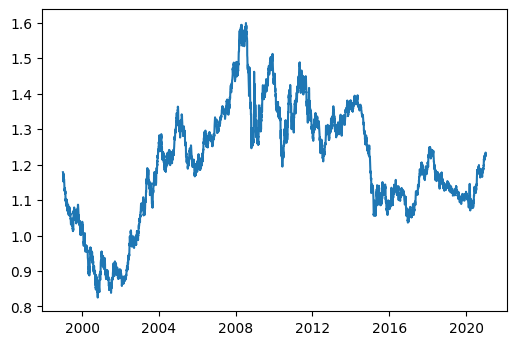

In [12]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In the graph we have plotted above, We see many wiggles and not a smooth line. This is because the exchange rate goes up and down day to day, But in general over the long run, We can see that it shows clear upwards or downwards trend.

Since, We want to show this to a broader audience and the daily exchange rate is not in our goal, we can make our graph smoother by showing long-term trends, For that we will use **rolling mean**, also known as moving average.

To sum up **rolling mean**, it calculates the mean of the values within the window of the values.

For example: if the window is 2, the second value in the table will be the mean of first and second value and the 3rd value in the table will be the mean of 2nd and 3rd vlaue and so on.

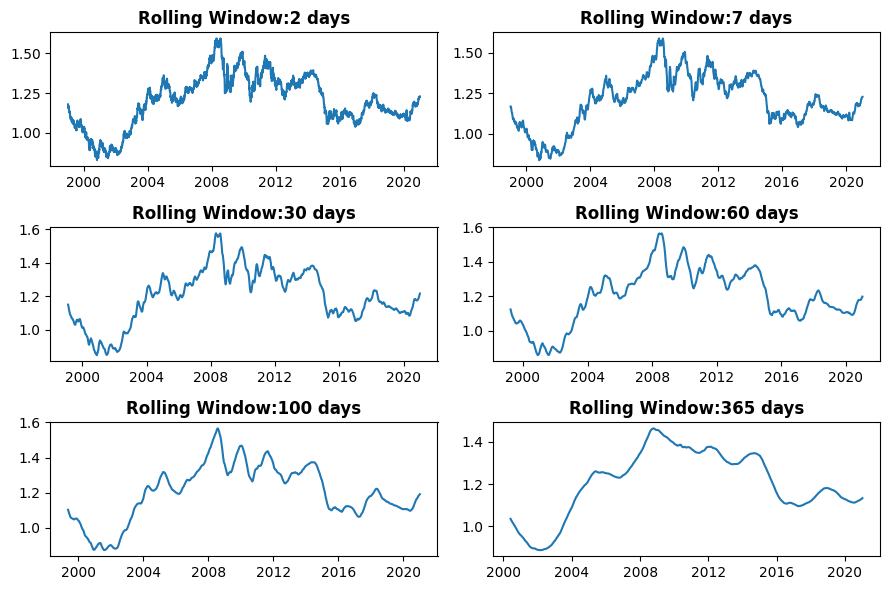

In [13]:
plt.figure(figsize=(9,6))
for i, days in zip(range(1,7),[2,7,30,60,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(days).mean()
            )
    plt.title('Rolling Window:{} days'.format(days),weight='bold')
plt.tight_layout()
plt.show()

So, We see all the graphs in different rolling windows, Among the graphs, The one with rolling window 30 seems to an appropriate choice for our graph, so we'll Continue with that one.


In [14]:
euro_to_dollar.loc[:,'rolling_mean']= euro_to_dollar['US_dollar'].rolling(30).mean()

## Idea for the Graph
---
Now , We need an idea for our graph, If we think about it, there can be so many ideas for a graph that shows exchange rates between 1999-2021. For this project We will go forward with this one:

**Showing changes in Euro-Dollar exchange rate during major historical events bewteen 1999-2021**

For that, We have decided on these three events:

* Introduction of Euro(1999):

When the euro was established, There were many changes in it's rate before it became stable.

* The 2008-2009 Global Economic Crisis:

This was one of the biggest market crash in the history and it lies within the period 1999-2021, So we'll include it in our graph

* The Covid Pandemic (2019-2021):

This was also a major event that changed the dynamic of many markets and changed the ways we live our lives.

*We have included a couple years before and after for each event so that we can also analyse the aftereffects.*

Below We'll create three seperate DataFrames for each event and we'll use them in our graph.


In [15]:
#Intro of Euro currency in 1999

intro_of_euro=euro_to_dollar[euro_to_dollar['Time']<dt.datetime(2004,3,1)].copy()

#2008-2009 economic crash

economic_crash=euro_to_dollar[(euro_to_dollar['Time']>dt.datetime(2007,1,1)) & (euro_to_dollar['Time']<dt.datetime(2011,1,1))].copy()
economic_crash

#2020 pandemic
covid_pandemic=euro_to_dollar[(euro_to_dollar['Time']>dt.datetime(2017,1,1)) & (euro_to_dollar['Time']<dt.datetime(2021,1,1))].copy()


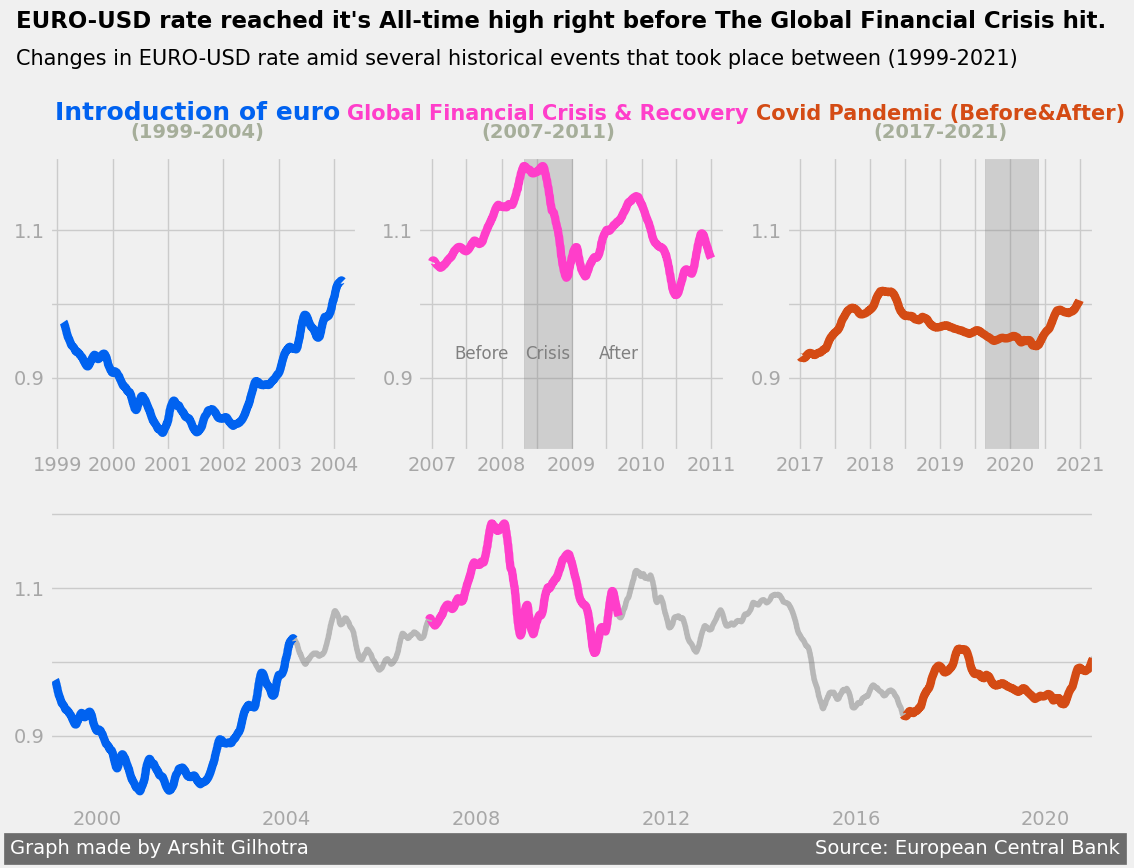

In [28]:
style.use('fivethirtyeight') # We will 'fivethirtyeight' style from matplotlib
fig=plt.figure(figsize=(12,8))
# making a gridspec, so we can freely use how we want our plots to be placed
# on the figure
gs = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0]) # first small plot
ax2 = fig.add_subplot(gs[0, 1]) # second small plot
ax3 = fig.add_subplot(gs[0, 2]) # third small plot
ax4 = fig.add_subplot(gs[1, :]) #fourth big plot

#First Grpah
ax1.plot(intro_of_euro['Time'],intro_of_euro['rolling_mean'],color='#0062F0',linewidth=6)
ax1.set_ylim(0.8,1.6)

#setting y-ticklabels
ax1.set_yticklabels(['',0.9,'',1.1,'',1.3,'',1.5,''],alpha=0.3) 
#setting x-ticklabels
ax1.set_xticklabels(['','1999','2000','2001','2002','2003','2004'],alpha=0.3)
ax1.text(730678,1.7,'Introduction of euro',weight='bold',color='#0062F0',size=18,horizontalalignment='center')
ax1.text(730678,1.65,'(1999-2004)',weight='bold',color='#A6AE9A',horizontalalignment='center')


# Second Graph
ax2.plot(economic_crash['Time'],economic_crash['rolling_mean'],color='#FF3ECA',linewidth=6)
ax2.set_ylim(0.8,1.6)
ax2.set_yticklabels(['',0.9,'',1.1,'',1.3,'',1.5,''],alpha=0.3)
ax2.text(733285.0,1.7,'Global Financial Crisis & Recovery',weight='bold',color='#FF3ECA',size=15,horizontalalignment='center')
ax2.text(733285,1.65,'(2007-2011)',weight='bold',color='#A6AE9A',horizontalalignment='center')
ax2.set_xticklabels(['2007','',"2008",'','2009','','2010','','2011'],alpha=0.3)

#shading the region in graph and the text inside graph
ax2.axvspan(dt.datetime(2008,4,25),dt.datetime(2009,1,1),color='grey',alpha=0.3)
ax2.text(dt.datetime(2007,5,1),1.05,'Before',color='grey',size=12)
ax2.text(dt.datetime(2008,5,5),1.05,'Crisis',color='grey',size=12)
ax2.text(dt.datetime(2009,5,22),1.05,'After',color='grey',size=12)

# Third Graph
ax3.plot(covid_pandemic['Time'],covid_pandemic['rolling_mean'],color='#D44B14',linewidth=6)
ax3.set_ylim(0.8,1.6)
ax3.set_yticklabels(['',0.9,'',1.1,'',1.3,'',1.5,''],alpha=0.3)
ax3.set_xticklabels(['2017','','2018',"",'2019','','2020','','2021'],alpha=0.3)
ax3.text(737060.5,1.7,'Covid Pandemic (Before&After)',weight='bold',color='#D44B14',size=15,horizontalalignment='center')
ax3.text(737060.5,1.65,'(2017-2021)',weight='bold',color='#A6AE9A',horizontalalignment='center')
ax3.axvspan(dt.datetime(2019,8,25),dt.datetime(2020,5,28),color='grey',alpha=0.3)

# Fourth Graph

# the whole `euro_to_dollar` plot
ax4.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'],alpha=0.5,color='grey')

#shading intro_to_euro graph over the orignal long graph
ax4.plot(intro_of_euro['Time'],intro_of_euro['rolling_mean'],color='#0062F0',linewidth=6)

#shading economic crisis graph over the orignal long graph
ax4.plot(economic_crash['Time'],economic_crash['rolling_mean'],color='#FF3ECA',linewidth=6)

#shading covid graph over the orignal long graph
ax4.plot(covid_pandemic['Time'],covid_pandemic['rolling_mean'],color='#D44B14',linewidth=6)
ax4.grid(axis='x') # No y axis grid in 4th grpah
ax4.set_yticklabels(['',0.9,'',1.1,'',1.3,'',1.5,''],alpha=0.3)
ax4.set_xlim(dt.datetime(1999,1,1),dt.datetime(2021,1,4))
ax4.axvline(729659)
ax4.set_xticklabels(['',2000,2004,2008,2012,2016,2020,''],alpha=0.3)

# Adding Title and Subtitle
ax1.text(729480,1.95,"EURO-USD rate reached it's All-time high right before The Global Financial Crisis hit.",weight='bold',fontsize=16.5)
ax1.text(729480,1.85,"Changes in EURO-USD rate amid several historical events that took place between (1999-2021)",fontsize=15)

# Adding signature Bar
ax4.text(729450,0.68,'Graph made by Arshit Gilhotra'+' '*81+'Source: European Central Bank',backgroundcolor='#6C6C6C',color='white')

plt.show()


And It's done!, We have completed our graph now. Hope you liked this project.

***AG***